# Download Required Files

## Downloading trained face landmark detector (Compressed)

In [ ]:
import dlib

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2021-05-19 10:36:36--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  14.8MB/s    in 5.6s    

2021-05-19 10:36:42 (10.9 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



## Decompressing downloaded model

In [ ]:
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

## Downloading sample image
You can upload your own image from left side files pannel

In [ ]:
!wget -O portrait1.jpg http://www.fashionfemale.net/wp-content/uploads/2013/09/Short-Sides-Long-Top-Haircut-Men-Sample.jpg
!wget -O portrait2.jpg https://cdn.gsmarena.com/imgroot/news/17/10/pixel-camera-samples/gallery/gsmarena_005.jpg
!wget -O portrait3.jpg https://us.v-cdn.net/6031042/uploads/editor/wb/0x49xoj5it92.jpeg

--2021-05-19 10:36:52--  http://www.fashionfemale.net/wp-content/uploads/2013/09/Short-Sides-Long-Top-Haircut-Men-Sample.jpg
Resolving www.fashionfemale.net (www.fashionfemale.net)... 185.151.30.147, 2a07:7800::147
Connecting to www.fashionfemale.net (www.fashionfemale.net)|185.151.30.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21225 (21K) [image/jpeg]
Saving to: ‘portrait1.jpg’

portrait1.jpg       100%[===================>]  20.73K  --.-KB/s    in 0.01s   

2021-05-19 10:36:53 (1.50 MB/s) - ‘portrait1.jpg’ saved [21225/21225]

--2021-05-19 10:36:54--  https://cdn.gsmarena.com/imgroot/news/17/10/pixel-camera-samples/gallery/gsmarena_005.jpg
Resolving cdn.gsmarena.com (cdn.gsmarena.com)... 104.22.9.71, 104.22.8.71, 172.67.25.108, ...
Connecting to cdn.gsmarena.com (cdn.gsmarena.com)|104.22.9.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2117392 (2.0M) [image/jpeg]
Saving to: ‘portrait2.jpg’

portrait2.jpg       100%[======

# Importing Libraries

In [ ]:
import numpy as np

import cv2
# only for google colab, not required if running in on local system
from google.colab.patches import cv2_imshow

import imutils
from imutils import face_utils

# Reading, and converting to grayscale Image

In [ ]:
def get_image_gray(file_name):
    # reading image
    image = cv2.imread(file_name)
    # resizing for better performance
    image = imutils.resize(image, width=512)
    # converting to grayscale image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray

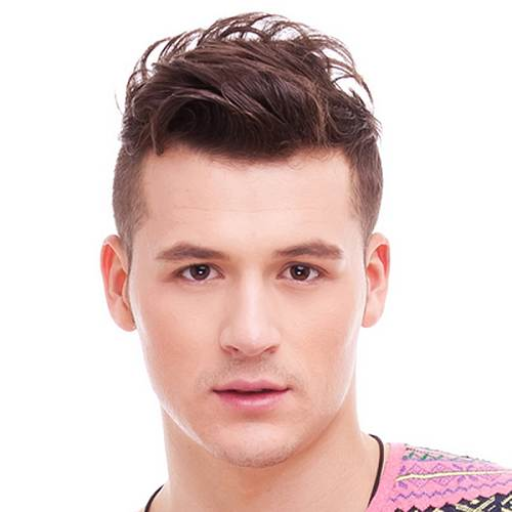

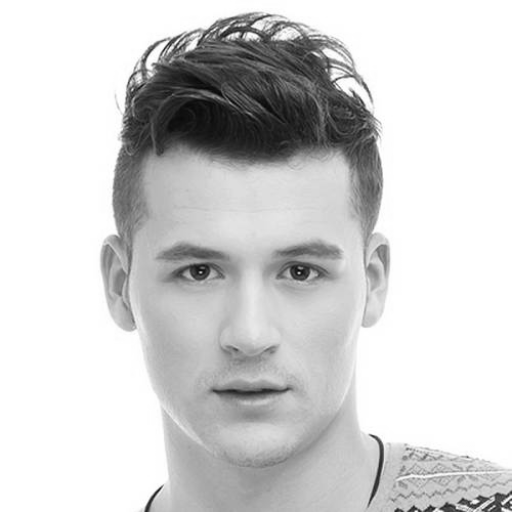

In [ ]:
# you can change file name with any other image file you have uploaded
# or you can change it to portrait2.jpg
image, gray = get_image_gray(file_name='portrait1.jpg')

# to display image
cv2_imshow(image)
cv2_imshow(gray)

# Detecting Face

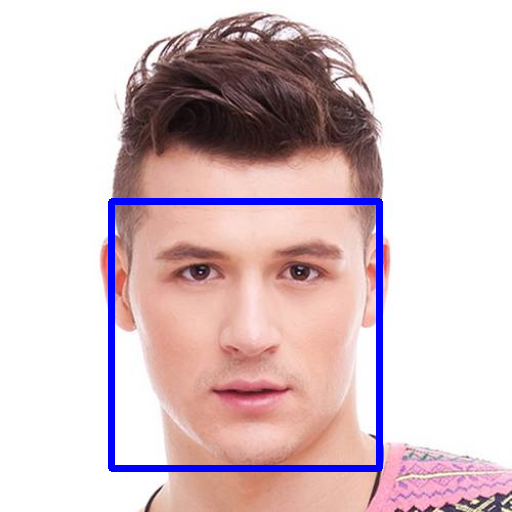

In [ ]:
# face detector
detector = dlib.get_frontal_face_detector()

image, gray = get_image_gray(file_name='portrait1.jpg')

# detecting faces in image
faces = detector(gray, 1)
for face in faces:
    # getting bounding box 
    (x, y, w, h) = face_utils.rect_to_bb(face)
    
    # drawing bounding box
    cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0), 5)
    
# showing image
cv2_imshow(image)

# Detecting Facial Landmarks

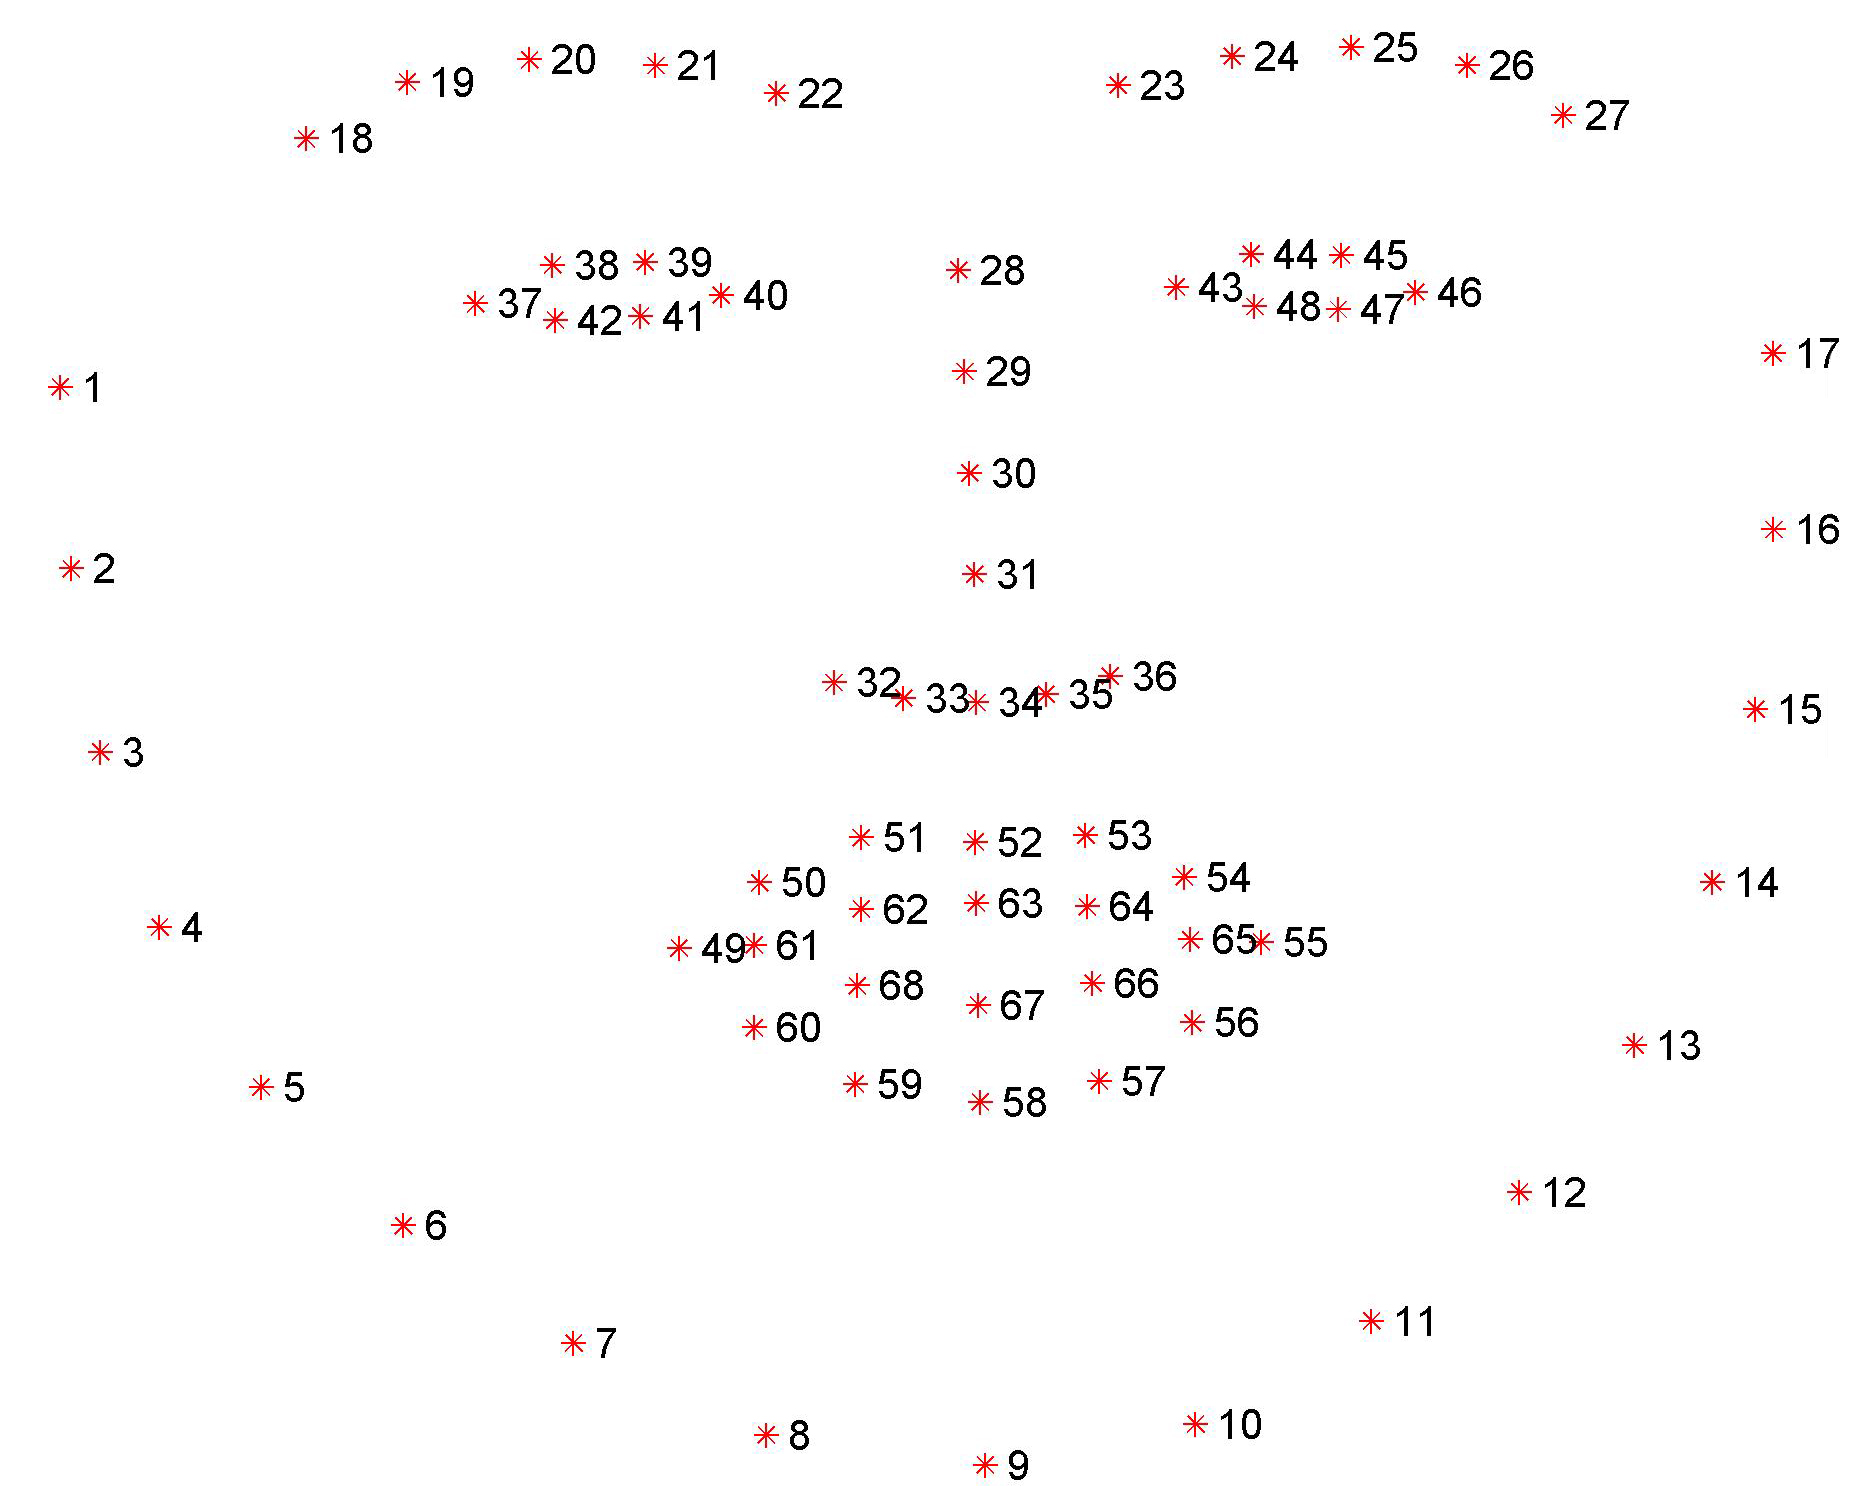

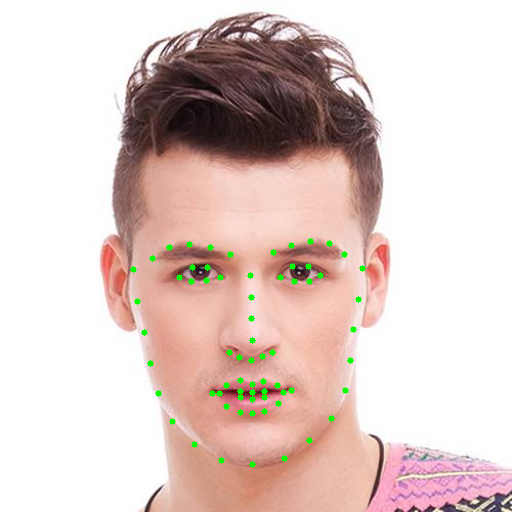

In [ ]:
# facial landmarks predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

image, gray = get_image_gray(file_name='portrait1.jpg')

# detecting faces in image
faces = detector(gray, 1)

for face in faces:
    landmarks = predictor(gray, face)
    # converting to numpy array
    landmarks_np = face_utils.shape_to_np(landmarks)
    for (x, y) in landmarks_np:
                   #image  coordinates radius color thickness 
        cv2.circle(image, (x, y), 3, (0, 255, 0), -1)

# showing image
cv2_imshow(image)

# Distance between two points

In [ ]:
def distance(a, b):
    # a -> (x1, y1)
    # b -> (x2, y2)
    # used to calculate distance between two points
    dis = np.sqrt( (b[0] - a[0])**2 + (b[1] - a[1])**2 )
    return int(dis) 

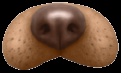

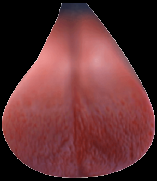

In [ ]:
nose_filter_main = cv2.imread('nose.png')
tongue_filter_main = cv2.imread('tongue.png')
# showing filters
cv2_imshow(nose_filter_main)
cv2_imshow(tongue_filter_main)

# Resizing Filters size

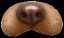

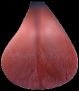

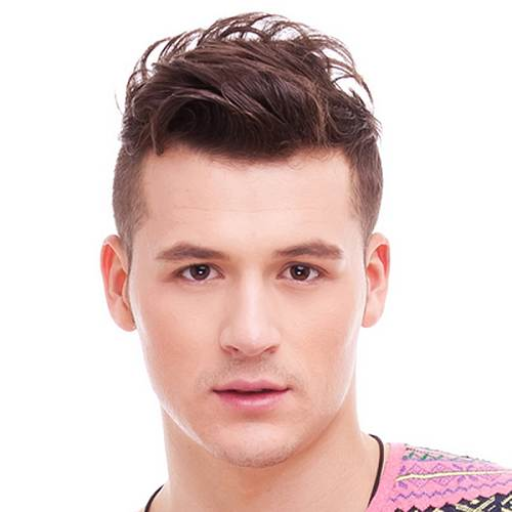

In [ ]:
image, gray = get_image_gray('portrait1.jpg')

faces = detector(gray, 1)
for face in faces:
    landmarks = predictor(gray, face)
    landmarks_np = face_utils.shape_to_np(landmarks)
    # Nose coordinates
    left_nose = (landmarks.part(31).x, landmarks.part(31).y) # indexing starts from 0, that's why 31 is passed instead of 32
    right_nose = (landmarks.part(35).x, landmarks.part(35).y)
    # calculating nose width
    nose_width = int( distance(left_nose, right_nose) * 1.5 ) # scaling factor -> 1.5, we can change this
    # resizing filter according to nose width
    nose = imutils.resize(nose_filter_main.copy(), width=nose_width)

    # Mouth
    left_mouth = (landmarks.part(48).x, landmarks.part(48).y)
    right_mouth = (landmarks.part(54).x, landmarks.part(54).y)
    # calculating mouth width
    mouth_width = int( distance(left_mouth, right_mouth) * 1 ) # scaling factor -> 1.5, we can change this
    # resizing filter according to nose width
    tongue = imutils.resize(tongue_filter_main.copy(), width=mouth_width)

# showing images
cv2_imshow(nose)
cv2_imshow(tongue)
cv2_imshow(image)

# Determining Region of Interest (ROI)

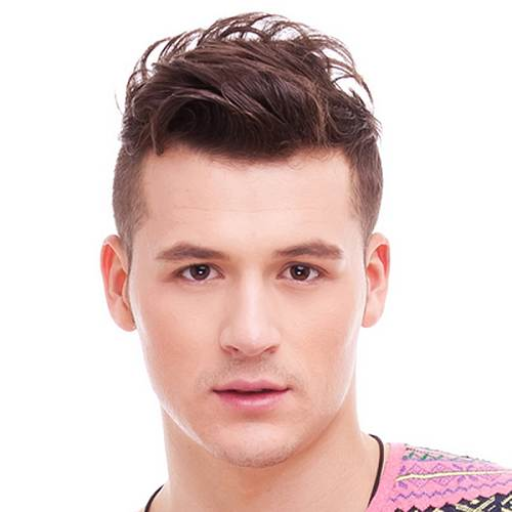

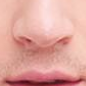

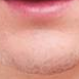

In [ ]:
image, gray = get_image_gray('portrait1.jpg')

faces = detector(gray, 1)
for face in faces:
    landmarks = predictor(gray, face)
    landmarks_np = face_utils.shape_to_np(landmarks)
    # Nose
    left_nose = (landmarks.part(31).x, landmarks.part(31).y)
    right_nose = (landmarks.part(35).x, landmarks.part(35).y)
    # center of nose -> mean of all nose points
    nose_anchor = np.mean(landmarks_np[30:36], axis=0) 
    # calculating nose width
    nose_width = int( distance(left_nose, right_nose) * 2 ) # scaling factor -> 2
    # resizing filter according to nose width
    nose = imutils.resize(nose_filter_main.copy(), width=nose_width)

    # Nose ROI
    rows_nose, cols_nose, _ = nose.shape
    nose_height = cols_nose
    top_left_nose = (int(nose_anchor[0] - nose_width / 2), int(nose_anchor[1] - nose_height / 2))
    bottom_right_nose = (int(nose_anchor[0] + nose_width / 2), int(nose_anchor[1] + nose_height / 2))
    nose_roi = image[top_left_nose[1]: top_left_nose[1] + nose_height, top_left_nose[0]: top_left_nose[0] + nose_width]

    # Mouth
    left_mouth = (landmarks.part(48).x, landmarks.part(48).y)
    right_mouth = (landmarks.part(54).x, landmarks.part(54).y)
    # center of mouth -> mean of all (49, 55, 8, 10) points
    tongue_anchor = np.mean(landmarks_np[np.r_[48, 54, 7, 9]], axis=0)
    # calculating mouth width
    tongue_width = int( distance(left_mouth, right_mouth) * 1 ) # scaling factor -> 1.5
    # resizing filter according to required tongue width
    tongue = imutils.resize(tongue_filter_main.copy(), width=tongue_width)

    # Tongue ROI
    rows_tongue, cols_tongue, _ = tongue.shape
    tongue_height = cols_tongue
    # top_left_tongue = (int(tongue_anchor[0] - tongue_width / 2), int(tongue_anchor[1] - tongue_height / 2))
    # bottom_right_tongue = (int(tongue_anchor[0] + tongue_width / 2), int(tongue_anchor[1] + tongue_height / 2))
    top_left_tongue = left_mouth
    bottom_right_tongue = (int(left_mouth[0] + tongue_width), int(left_mouth[1] + tongue_height))
    tongue_roi = image[top_left_tongue[1]: top_left_tongue[1] + tongue_height, top_left_tongue[0]: top_left_tongue[0] + tongue_width]


cv2_imshow(image)
cv2_imshow(nose_roi)
cv2_imshow(tongue_roi)

# Creating masks for filters

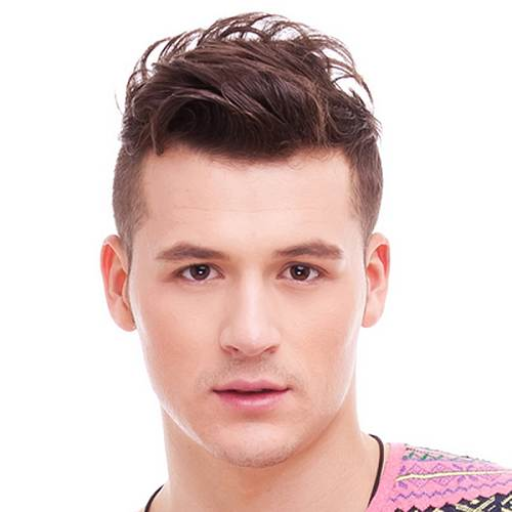

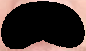

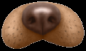

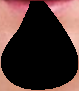

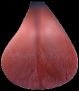

In [ ]:
image, gray = get_image_gray('portrait1.jpg')

faces = detector(gray, 1)
for face in faces:
    landmarks = predictor(gray, face)
    landmarks_np = face_utils.shape_to_np(landmarks)
    # Nose
    left_nose = (landmarks.part(31).x, landmarks.part(31).y)
    right_nose = (landmarks.part(35).x, landmarks.part(35).y)
    # center of nose -> mean of all nose points
    nose_anchor = np.mean(landmarks_np[30:36], axis=0) # center point of nose
    # calculating nose width
    nose_width = int( distance(left_nose, right_nose) * 2 ) # scaling factor -> 2
    # resizing filter according to nose width
    nose = imutils.resize(nose_filter_main.copy(), width=nose_width)

    # Nose ROI -  filter size will determine how much area of facial feature is required
    rows_nose, cols_nose, _ = nose.shape
    nose_height = rows_nose
    top_left_nose = (int(nose_anchor[0] - nose_width / 2), int(nose_anchor[1] - nose_height / 2))
    bottom_right_nose = (int(nose_anchor[0] + nose_width / 2), int(nose_anchor[1] + nose_height / 2))
    nose_roi = image[top_left_nose[1]: top_left_nose[1] + nose_height, top_left_nose[0]: top_left_nose[0] + nose_width]

    # creating masks for nose
    nose_gray = cv2.cvtColor(nose, cv2.COLOR_BGR2GRAY) # Converted filter to gray scale
    _, nose_mask = cv2.threshold(nose_gray, 10, 255, cv2.THRESH_BINARY) #will convert that area to black
    nose_mask_inv = cv2.bitwise_not(nose_mask) #will create masks
    
    # Now black-out the area of filter in ROI
    background_nose = cv2.bitwise_and(nose_roi,nose_roi,mask = nose_mask_inv)
    # Take only region of filter from filter image.
    foreground_nose = cv2.bitwise_and(nose,nose,mask = nose_mask)
    

    # Mouth
    left_mouth = (landmarks.part(48).x, landmarks.part(48).y)
    right_mouth = (landmarks.part(54).x, landmarks.part(54).y)
    # center of mouth -> mean of all (49, 55, 8, 10) points
    tongue_anchor = np.mean(landmarks_np[np.r_[48, 54, 7, 9]], axis=0)
    # calculating mouth width
    tongue_width = int( distance(left_mouth, right_mouth) * 1 ) # scaling factor -> 1.5
    # resizing filter according to required tongue width
    tongue = imutils.resize(tongue_filter_main.copy(), width=tongue_width)

    # Tongue ROI
    rows_tongue, cols_tongue, _ = tongue.shape
    tongue_height = rows_tongue
    # top_left_tongue = (int(tongue_anchor[0] - tongue_width / 2), int(tongue_anchor[1] - tongue_height / 2))
    # bottom_right_tongue = (int(tongue_anchor[0] + tongue_width / 2), int(tongue_anchor[1] + tongue_height / 2))
    top_left_tongue = left_mouth
    bottom_right_tongue = (int(left_mouth[0] + tongue_width), int(left_mouth[1] + tongue_height))
    tongue_roi = image[top_left_tongue[1]: top_left_tongue[1] + tongue_height, top_left_tongue[0]: top_left_tongue[0] + tongue_width]


    # creating masks for tongue
    tongue_gray = cv2.cvtColor(tongue, cv2.COLOR_BGR2GRAY)
                                  #image  threshold max_value technique      
    _, tongue_mask = cv2.threshold(tongue_gray, 10, 255, cv2.THRESH_BINARY) # If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
    tongue_mask_inv = cv2.bitwise_not(tongue_mask) 
    
    # Now black-out the area of filter in ROI
    background_tongue = cv2.bitwise_and(tongue_roi,tongue_roi,mask = tongue_mask_inv)
    # Take only region of filter from filter image.
    foreground_tongue = cv2.bitwise_and(tongue,tongue,mask = tongue_mask)


cv2_imshow(image)
cv2_imshow(nose_mask)
cv2_imshow(nose_mask_inv)
cv2_imshow(background_nose)
cv2_imshow(foreground_nose)
cv2_imshow(background_tongue)
cv2_imshow(foreground_tongue)

# Adding fIlters to portrait

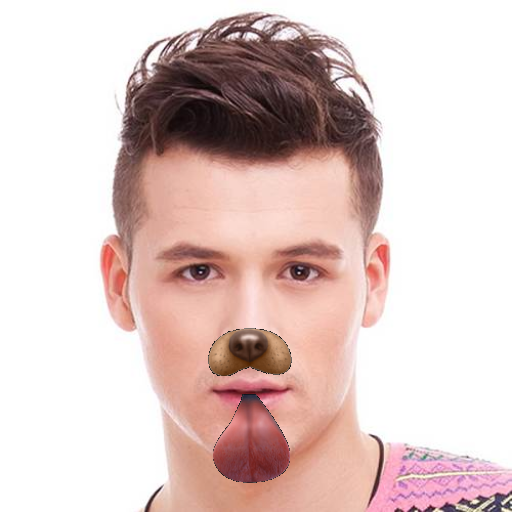

In [ ]:
image, gray = get_image_gray('portrait1.jpg')

faces = detector(gray, 1)
for face in faces:
    landmarks = predictor(gray, face)
    landmarks_np = face_utils.shape_to_np(landmarks)
    # Nose
    left_nose = (landmarks.part(31).x, landmarks.part(31).y)
    right_nose = (landmarks.part(35).x, landmarks.part(35).y)
    # center of nose -> mean of all nose points
    nose_anchor = np.mean(landmarks_np[30:36], axis=0) 
    # calculating nose width
    nose_width = int( distance(left_nose, right_nose) * 2 ) # scaling factor -> 2
    # resizing filter according to nose width
    nose = imutils.resize(nose_filter_main.copy(), width=nose_width)

    # Nose ROI
    rows_nose, cols_nose, _ = nose.shape
    nose_height = rows_nose
    top_left_nose = (int(nose_anchor[0] - nose_width / 2), int(nose_anchor[1] - nose_height / 2))
    bottom_right_nose = (int(nose_anchor[0] + nose_width / 2), int(nose_anchor[1] + nose_height / 2))
    nose_roi = image[top_left_nose[1]: top_left_nose[1] + nose_height, top_left_nose[0]: top_left_nose[0] + nose_width]

    # creating masks for nose
    nose_gray = cv2.cvtColor(nose, cv2.COLOR_BGR2GRAY)
    _, nose_mask = cv2.threshold(nose_gray, 10, 255, cv2.THRESH_BINARY)
    nose_mask_inv = cv2.bitwise_not(nose_mask)
    
    # Now black-out the area of filter in ROI
    background_nose = cv2.bitwise_and(nose_roi,nose_roi,mask = nose_mask_inv)
    # Take only region of filter from filter image.
    foreground_nose = cv2.bitwise_and(nose,nose,mask = nose_mask)
    
    # merging background_nose and foreground_nose
    dst = cv2.add(background_nose, foreground_nose)
    image[top_left_nose[1]: top_left_nose[1] + nose_height, top_left_nose[0]: top_left_nose[0] + nose_width] = dst
        

    # Mouth
    left_mouth = (landmarks.part(48).x, landmarks.part(48).y)
    right_mouth = (landmarks.part(54).x, landmarks.part(54).y)
    # center of mouth -> mean of all (49, 55, 8, 10) points
    tongue_anchor = np.mean(landmarks_np[np.r_[48, 54, 7, 9]], axis=0)
    # calculating mouth width
    tongue_width = int( distance(left_mouth, right_mouth) * 1 ) # scaling factor -> 1.5
    # resizing filter according to required tongue width
    tongue = imutils.resize(tongue_filter_main.copy(), width=tongue_width)

    # Tongue ROI
    rows_tongue, cols_tongue, _ = tongue.shape
    tongue_height = rows_tongue
    # top_left_tongue = (int(tongue_anchor[0] - tongue_width / 2), int(tongue_anchor[1] - tongue_height / 2))
    # bottom_right_tongue = (int(tongue_anchor[0] + tongue_width / 2), int(tongue_anchor[1] + tongue_height / 2))
    top_left_tongue = left_mouth
    bottom_right_tongue = (int(left_mouth[0] + tongue_width), int(left_mouth[1] + tongue_height))
    tongue_roi = image[top_left_tongue[1]: top_left_tongue[1] + tongue_height, top_left_tongue[0]: top_left_tongue[0] + tongue_width]


    # creating masks for nose
    tongue_gray = cv2.cvtColor(tongue, cv2.COLOR_BGR2GRAY)
    _, tongue_mask = cv2.threshold(tongue_gray, 10, 255, cv2.THRESH_BINARY)
    tongue_mask_inv = cv2.bitwise_not(tongue_mask)
    
    # Now black-out the area of filter in ROI
    background_tongue = cv2.bitwise_and(tongue_roi,tongue_roi,mask = tongue_mask_inv)
    # Take only region of filter from filter image.
    foreground_tongue = cv2.bitwise_and(tongue,tongue,mask = tongue_mask)
    
    # merging background_nose and foreground_nose
    dst = cv2.add(background_tongue, foreground_tongue)
    image[top_left_tongue[1]: top_left_tongue[1] + tongue_height, top_left_tongue[0]: top_left_tongue[0] + tongue_width] = dst
    

cv2_imshow(image)

# Rotating filters according to face in image

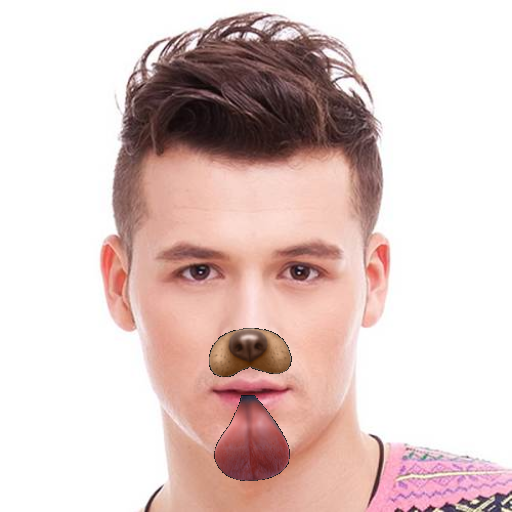

In [ ]:
image, gray = get_image_gray('portrait1.jpg')

faces = detector(gray, 1)
for face in faces:
    landmarks = predictor(gray, face)
    landmarks_np = face_utils.shape_to_np(landmarks)

    # face orientation calculation
    nose_line = landmarks_np[27:31]
    delta_x = landmarks_np[27,0] - landmarks_np[30,0]
    delta_y = landmarks_np[27,1] - landmarks_np[30,1]
    face_orientation = np.arctan2(delta_y, delta_x) * 180 / np.pi
    if face_orientation<0:
        face_orientation = face_orientation + 90
    else:
        face_orientation = face_orientation - 90

    # Nose
    left_nose = (landmarks.part(31).x, landmarks.part(31).y)
    right_nose = (landmarks.part(35).x, landmarks.part(35).y)
    # center of nose -> mean of all nose points
    nose_anchor = np.mean(landmarks_np[30:36], axis=0) 
    # calculating nose width
    nose_width = int( distance(left_nose, right_nose) * 2 ) # scaling factor -> 2
    # rotating filter according to face orientation
    nose = imutils.rotate_bound(nose_filter_main.copy(), face_orientation)
    # resizing filter according to nose width
    nose = imutils.resize(nose, width=nose_width)

    # Nose ROI
    rows_nose, cols_nose, _ = nose.shape
    nose_height = rows_nose
    top_left_nose = (int(nose_anchor[0] - nose_width / 2), int(nose_anchor[1] - nose_height / 2))
    bottom_right_nose = (int(nose_anchor[0] + nose_width / 2), int(nose_anchor[1] + nose_height / 2))
    nose_roi = image[top_left_nose[1]: top_left_nose[1] + nose_height, top_left_nose[0]: top_left_nose[0] + nose_width]

    # creating masks for nose
    nose_gray = cv2.cvtColor(nose, cv2.COLOR_BGR2GRAY)
    _, nose_mask = cv2.threshold(nose_gray, 10, 255, cv2.THRESH_BINARY)
    nose_mask_inv = cv2.bitwise_not(nose_mask)
    
    # Now black-out the area of filter in ROI
    background_nose = cv2.bitwise_and(nose_roi,nose_roi,mask = nose_mask_inv)
    # Take only region of filter from filter image.
    foreground_nose = cv2.bitwise_and(nose,nose,mask = nose_mask)
    
    # merging background_nose and foreground_nose
    dst = cv2.add(background_nose, foreground_nose)
    image[top_left_nose[1]: top_left_nose[1] + nose_height, top_left_nose[0]: top_left_nose[0] + nose_width] = dst
        

    # Mouth
    left_mouth = (landmarks.part(48).x, landmarks.part(48).y)
    right_mouth = (landmarks.part(54).x, landmarks.part(54).y)
    # center of mouth -> mean of all (49, 55, 8, 10) points
    tongue_anchor = np.mean(landmarks_np[np.r_[48, 54, 7, 9]], axis=0)
    # calculating mouth width
    tongue_width = int( distance(left_mouth, right_mouth) * 1 ) # scaling factor -> 1.5
    # rotating filter according to face orientation
    tongue = imutils.rotate_bound(tongue_filter_main.copy(), face_orientation)
    # resizing filter according to nose width
    tongue = imutils.resize(tongue, width=tongue_width)


    # Tongue ROI
    rows_tongue, cols_tongue, _ = tongue.shape
    tongue_height = rows_tongue
    # top_left_tongue = (int(tongue_anchor[0] - tongue_width / 2), int(tongue_anchor[1] - tongue_height / 2))
    # bottom_right_tongue = (int(tongue_anchor[0] + tongue_width / 2), int(tongue_anchor[1] + tongue_height / 2))
    top_left_tongue = left_mouth
    bottom_right_tongue = (int(left_mouth[0] + tongue_width), int(left_mouth[1] + tongue_height))
    tongue_roi = image[top_left_tongue[1]: top_left_tongue[1] + tongue_height, top_left_tongue[0]: top_left_tongue[0] + tongue_width]


    # creating masks for nose
    tongue_gray = cv2.cvtColor(tongue, cv2.COLOR_BGR2GRAY)
    _, tongue_mask = cv2.threshold(tongue_gray, 10, 255, cv2.THRESH_BINARY)
    tongue_mask_inv = cv2.bitwise_not(tongue_mask)
    
    # Now black-out the area of filter in ROI
    background_tongue = cv2.bitwise_and(tongue_roi,tongue_roi,mask = tongue_mask_inv)
    # Take only region of filter from filter image.
    foreground_tongue = cv2.bitwise_and(tongue,tongue,mask = tongue_mask)
    
    # merging background_nose and foreground_nose
    dst = cv2.add(background_tongue, foreground_tongue)
    image[top_left_tongue[1]: top_left_tongue[1] + tongue_height, top_left_tongue[0]: top_left_tongue[0] + tongue_width] = dst
    
cv2_imshow(image)